<a href="https://colab.research.google.com/github/Dhivyadarsshni/PrimaryAmoebicMeningoencephalitis-Py-Code/blob/main/Primary_Amoebic_Meningoencephalitis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

**Data Collection and Analysis**

In [ ]:
# Loading the dataset to pandas DataFrame
PAM_dataset = pd.read_csv('/content/PAM Dataset -Final.csv')

# Data manipulation

In [ ]:
# To print the first 5 rows of the dataset
PAM_dataset.head()

,Age,Gender,Infection period,Fever,Sensitivity to light,Stiff neck,Altered Sensorium,CSF - WBC (cells/μL),CSF - Glucose (mg/dL),CSF - Protein (mg/dL),Meningitis,CSF - Direct Microscopy,PAM
0,46,Male,7,Y,N,Y,N,2,48,30,0,Negative,Negative
1,37,Male,6,Y,Y,Y,N,994,18,404,1,Positive,Confirmed
2,13,Female,5,Y,N,Y,Y,1,53,25,0,Negative,Negative
3,21,Male,8,Y,Y,N,N,356,57,89,1,Negative,Negative
4,59,Male,4,Y,N,Y,N,279,39,470,1,Positive,Confirmed


In [ ]:
# To print the number of rows and columns present in the dataset
PAM_dataset.shape

(881, 13)

In [ ]:
# To identify the count of 'Confirmed' and 'Negative' cases
PAM_dataset['PAM'].value_counts()

,count
PAM,
Negative,500
Confirmed,381


In [ ]:
PAM_dataset.groupby('PAM').mean('Infection period, CSF - WBC (cells/μL), CSF - Glucose (mg/dL), CSF - Protein (mg/dL)')

,Age,Infection period,CSF - WBC (cells/μL),CSF - Glucose (mg/dL),CSF - Protein (mg/dL),Meningitis
PAM,,,,,,
Confirmed,31.511811,6.976378,1101.52231,19.721785,314.734908,1.000
Negative,30.906000,7.046000,453.51000,55.112000,74.770000,0.292


In [ ]:
# To separate data and labels
X = PAM_dataset.drop(columns=['PAM', 'Gender', 'Fever', 'Sensitivity to light', 'Stiff neck', 'Altered Sensorium', 'Meningitis', 'CSF - Direct Microscopy'])
Y = PAM_dataset['PAM']

In [ ]:
print(X)

     Age  Infection period  CSF - WBC (cells/μL)   CSF - Glucose (mg/dL)  \
0     46                 7                      2                     48   
1     37                 6                    994                     18   
2     13                 5                      1                     53   
3     21                 8                    356                     57   
4     59                 4                    279                     39   
..   ...               ...                    ...                    ...   
876   48                 7                   1088                     28   
877    7                 7                      1                     76   
878   51                 6                    903                     12   
879   25                 4                   3262                      5   
880   18                 9                    735                     27   

     CSF - Protein (mg/dL)  
0                       30  
1                      404  


**Data Standardization**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
X = standardized_data

In [ ]:
print(X)
print(Y)

[[ 9.39918667e-01 -5.31622895e-03 -5.90906264e-01  3.43892383e-01
  -6.19202428e-01]
 [ 3.69580019e-01 -3.39858922e-01  2.10156773e-01 -9.15331181e-01
   9.39787744e-01]
 [-1.15132304e+00 -6.74401615e-01 -5.91713787e-01  5.53762977e-01
  -6.40044543e-01]
 ...
 [ 1.25677347e+00 -3.39858922e-01  1.36672160e-01 -1.16717589e+00
   1.01481936e+00]
 [-3.90871511e-01 -1.00894431e+00  2.04161944e+00 -1.46099473e+00
   7.31366598e-01]
 [-8.34468237e-01  6.63769157e-01  1.00825828e-03 -5.37564112e-01
   4.27071725e-01]]
0       Negative
1      Confirmed
2       Negative
3       Negative
4      Confirmed
         ...    
876    Confirmed
877     Negative
878    Confirmed
879     Negative
880    Confirmed
Name: PAM, Length: 881, dtype: object


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(881, 5) (660, 5) (221, 5)


**Training the model**

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
# To train the Support Machine Vector Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# **Model Evaluation**

# Accuracy Score

In [ ]:
# To get the accuracy score of the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print(f" Training data Accuracy: {training_data_accuracy * 100:.2f}%")

 Training data Accuracy: 91.21%


In [ ]:
# To get the accuracy score of the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print(f" Testing data Accuracy: {test_data_accuracy* 100: .2f}%")

 Testing data Accuracy:  93.21%


# Precision Score

In [ ]:
X_train_prediction= classifier.predict(X_train)
train_data_precision= precision_score(Y_train,X_train_prediction, pos_label='Confirmed')

In [ ]:
print(f" Training data Precision: {train_data_precision * 100:.2f}%")

 Training data Precision: 86.50%


In [ ]:
X_test_prediction= classifier.predict(X_test)
test_data_precision= precision_score(Y_test,X_test_prediction, pos_label='Confirmed')

In [ ]:
print(f" Testing data Precision: {test_data_precision * 100:.2f}%")

 Testing data Precision: 92.63%


## **CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score

# Define the scoring function using precision
precision_scorer = make_scorer(precision_score, pos_label='Confirmed')

# Perform cross-validation (let's say using 5 folds)
# cv = 5 means 5-fold cross-validation
scores = cross_val_score(classifier, X, Y, cv=5, scoring=precision_scorer)

# Print the precision for each fold and the average precision
print("Precision scores for each fold: ", scores*100)
print("Average precision score: ", scores.mean()*100)


Precision scores for each fold:  [86.41975309 89.33333333 93.50649351 90.24390244 80.43478261]
Average precision score:  87.98765299479332


## **HYPERPARAMETER TUNING**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score
# Step 3: Define the model
model = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring=make_scorer(precision_score, pos_label='Confirmed'), # Change pos_label as per your dataset
                           cv=5, n_jobs=-1)

# Step 4: Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Precision Score: ", grid_search.best_score_*100)

# Optionally: Test on the test set
best_model = grid_search.best_estimator_
test_precision = precision_score(Y_test, best_model.predict(X_test), pos_label='Confirmed') # Change pos_label as per your dataset
print("Test Precision Score: ", test_precision*100)



Best Hyperparameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Precision Score:  94.32443743615681
Test Precision Score:  98.95833333333334


## **CONFUSION MATRIX**

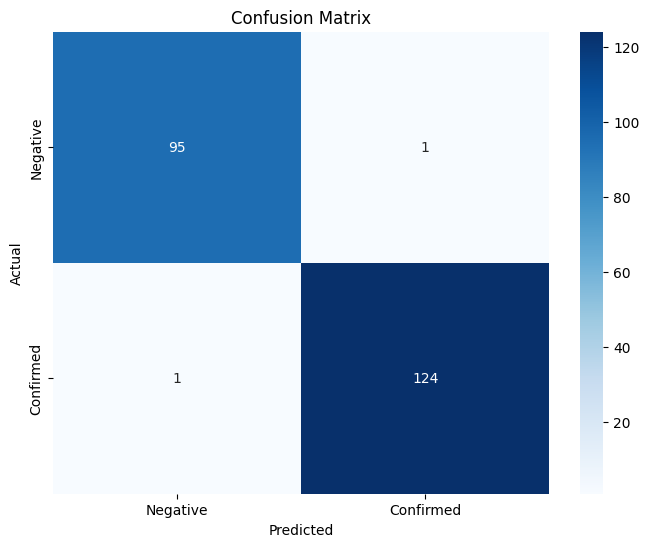

Classification Report:
              precision    recall  f1-score   support

   Confirmed       0.99      0.99      0.99        96
    Negative       0.99      0.99      0.99       125

    accuracy                           0.99       221
   macro avg       0.99      0.99      0.99       221
weighted avg       0.99      0.99      0.99       221



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Predict on the test set using the best model
Y_pred = best_model.predict(X_test)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Step 3: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Confirmed'], yticklabels=['Negative', 'Confirmed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Print classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


## **Visualization**

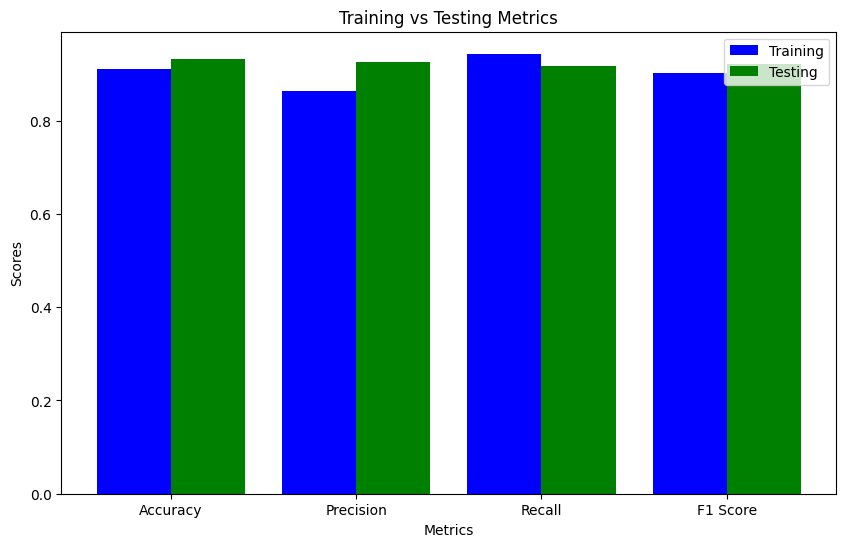

Training Metrics:
  Accuracy: 91.21%
  Precision: 86.50%
  Recall: 94.39%
  F1 Score: 90.27%

Testing Metrics:
  Accuracy: 93.21%
  Precision: 92.63%
  Recall: 91.67%
  F1 Score: 92.15%



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm

# Initialize and train the SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Generate predictions for training and testing sets
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

# Calculate metrics for training data
accuracy_train = accuracy_score(Y_train, Y_train_pred)
precision_train = precision_score(Y_train, Y_train_pred, pos_label='Confirmed', average='binary')
recall_train = recall_score(Y_train, Y_train_pred, pos_label='Confirmed', average='binary')
f1_train = f1_score(Y_train, Y_train_pred, pos_label='Confirmed', average='binary')

# Calculate metrics for testing data
accuracy_test = accuracy_score(Y_test, Y_test_pred)
precision_test = precision_score(Y_test, Y_test_pred, pos_label='Confirmed', average='binary')
recall_test = recall_score(Y_test, Y_test_pred, pos_label='Confirmed', average='binary')
f1_test = f1_score(Y_test, Y_test_pred, pos_label='Confirmed', average='binary')

# Organize metrics for plotting
metrics_train = [accuracy_train, precision_train, recall_train, f1_train]
metrics_test = [accuracy_test, precision_test, recall_test, f1_test]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting
x = range(len(metrics_labels))

plt.figure(figsize=(10, 6))
plt.bar(x, metrics_train, width=0.4, label='Training', color='blue', align='center')
plt.bar([i + 0.4 for i in x], metrics_test, width=0.4, label='Testing', color='green', align='center')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Training vs Testing Metrics')
plt.xticks([i + 0.2 for i in x], metrics_labels)
plt.legend()
plt.show()

print("Training Metrics:")
print(f"  Accuracy: {accuracy_train * 100:.2f}%")
print(f"  Precision: {precision_train * 100:.2f}%")
print(f"  Recall: {recall_train * 100:.2f}%")
print(f"  F1 Score: {f1_train * 100:.2f}%\n")

print("Testing Metrics:")
print(f"  Accuracy: {accuracy_test * 100:.2f}%")
print(f"  Precision: {precision_test * 100:.2f}%")
print(f"  Recall: {recall_test * 100:.2f}%")
print(f"  F1 Score: {f1_test * 100:.2f}%\n")





# **Making a Predictive System**

In [ ]:
input_data = (22,9,1,50,22)

# To change the input_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# To reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# To standardise the input data
std_data = scaler.transform(input_data_reshaped)

print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 'Negative'):
  print('No signs of Primary Amoebic Meningoencephalitis')
else:
  print('Primary Amoebic Meningoencephalitis is Confirmed')

[[-0.58098439  0.66376916 -0.59171379  0.42784062 -0.65254981]]
['Negative']
No signs of Primary Amoebic Meningoencephalitis


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (47,4,145,11,183)

# To change the input_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# To reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# To standardise the input data
std_data = scaler.transform(input_data_reshaped)

print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 'Negative'):
  print('No signs of Primary Amoebic Meningoencephalitis')
else:
  print('Primary Amoebic Meningoencephalitis is Confirmed')

[[ 1.00328963 -1.00894431 -0.47543044 -1.20915001  0.01856628]]
['Confirmed']
Primary Amoebic Meningoencephalitis is Confirmed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
